In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import yoda
yoda.__file__
%pwd

'/sdf/group/ldmx/users/dongyi/data/NLO_5m/Events/run_01'

In [17]:
def plotting(NLO_5m_x, NLO_5m_y, NLO_xerr, NLO_yerr, DELTA_5m_y, DELTA_yerr, title, plot_path, xlabel, xlim):
    fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios':[1, 1]}, figsize=(10,6))
    fig.subplots_adjust(hspace=0)

    axs[0].errorbar(NLO_5m_x, NLO_5m_y, marker='o', linestyle='none', xerr=NLO_xerr, yerr=NLO_yerr, label='NLO_5m_NWF')
    axs[0].errorbar(NLO_5m_x, DELTA_5m_y, marker='o', linestyle='none', xerr=NLO_xerr, yerr=DELTA_yerr, label='NLO_DELTA_5m_NWF')
    axs[1].plot(NLO_5m_x,np.ones(len(NLO_5m_x)))
    axs[1].plot(NLO_5m_x,(DELTA_5m_y/NLO_5m_y))

    axs[0].legend()
    axs[0].set_ylabel('Fraction of Events')
    #axs[1].set_xscale('log')
    axs[1].set_ylabel('DELTA/NLO')
    axs[0].set_title(title)
    axs[1].set_xlabel(xlabel)
    #axs[0].set_xlim(min(NLO_5m_x)*.9, max(NLO_5m_x)*1.1)
    #axs[1].set_xlim(min(NLO_5m_x)*.9, max(NLO_5m_x)*1.1)
    #axs[1].set_xlim(xlim)

    #fig.savefig(plot_path, bbox_inches='tight', dpi=200)

In [14]:
def setting(NLO_file, DELTA_file, dict):
    NLO=yoda.read(NLO_file)[dict]
    DELTA=yoda.read(DELTA_file)[dict]

    NLO_5m_x=NLO.xVals()
    NLO_5m_y=NLO.yVals()
    DELTA_5m_y=DELTA.yVals()
    NLO_xerr=[sub[0] for sub in NLO.xErrs()]
    NLO_yerr=NLO.yErrs()
    DELTA_yerr=DELTA.yErrs()

    return NLO_5m_x, NLO_5m_y, NLO_xerr, NLO_yerr, DELTA_5m_y, DELTA_yerr

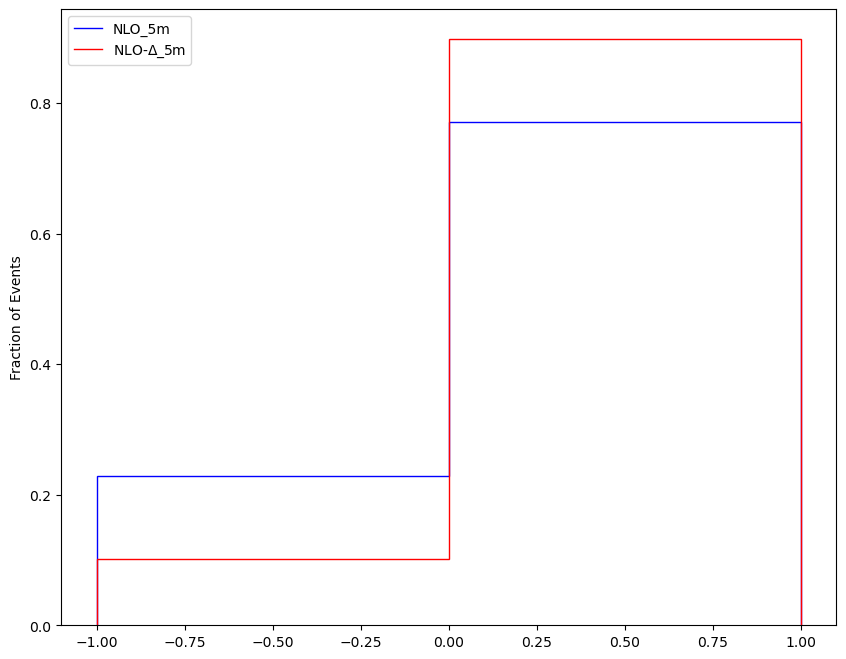

In [25]:
root_path = '/sdf/group/ldmx/users/dongyi/data/'
Event = '/Events/run_01/'

NLO_file = root_path + 'NLO_5m' + Event + 'NLO_5m_' +'XS.yoda'
DELTA_file = root_path + 'NLO_DELTA_5m' + Event + 'NLO_DELTA_5m_' +'XS.yoda'


dict = '/MC_XS/pmN'
title = ''
plot_path='/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/python-plots/NWF/' + 'NWF_'
xlabel=''
xlim=0


NLO_5m_x, NLO_5m_y, NLO_xerr, NLO_yerr, DELTA_5m_y, DELTA_yerr = setting(NLO_file, DELTA_file, dict)
xEdges = np.append(np.append(1.5*NLO_5m_x[0] - NLO_5m_x[1]*.5, [(NLO_5m_x[i] + NLO_5m_x[i+1])*.5 for i in range(len(NLO_5m_x)-1)]), 1.5*NLO_5m_x[-1]-.5*NLO_5m_x[-2])

#plotting(NLO_5m_x, NLO_5m_y, NLO_xerr, NLO_yerr, DELTA_5m_y, DELTA_yerr, title, plot_path, xlabel, xlim)
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.stairs(NLO_5m_y/5e6, xEdges, linestyle='-', color='blue', label='NLO_5m')
ax.stairs(DELTA_5m_y/5e6, xEdges, linestyle='-', color='red', label=r'NLO-$\Delta$_5m')
ax.set_ylabel('Fraction of Events')
ax.legend()

#print(DELTA_5m_y/5e6, NLO_5m_y/5e6)